# Collaborative recommender
With the collaborative-based filtering we will (based on one movie choice) recommend movies by finding similarities between the ratings from others that has rated the movie.

In [1]:
import modules.recommender.CollaborativeRecommender as cr

#### Get data
We are going to use data about movies and rating. We load our datasets from our folder "data".

In [2]:
movies_df = cr.load_movies()
movies_df.head()

,id,title
0,862.0,Toy Story
1,8844.0,Jumanji
2,15602.0,Grumpier Old Men
3,31357.0,Waiting to Exhale
4,11862.0,Father of the Bride Part II


In [3]:
movies_df.shape

(45466, 2)

In [4]:
ratings_df = cr.load_ratings()
ratings_df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
ratings_df.shape

(100004, 3)

#### Preparing data
We will now clean the movie dataframe.

In [6]:
# drops NaN values, rename id name to movieId to match rating_df id column
movies_df = cr.prepare_movies(movies_df)
movies_df.head()

,movieId,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [7]:
movies_df.shape

(45460, 2)

#### Transformation
We will now merge the dataframe to get a single dataframe we will use for our modelling. We will also reduce the size of dataframe by removing movies that do not have a high rating count.

##### Merging movies and ratings into one dataframe

In [8]:
# combine movie_df and rating_df into one dataframe
df = cr.merge_movies_and_ratings(ratings_df, movies_df)
df.head(100)

,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III
...,...,...,...,...
95,15,2105,4.0,American Pie
96,30,2105,2.0,American Pie
97,34,2105,4.0,American Pie
98,35,2105,3.5,American Pie


In [9]:
df.shape

(44994, 4)

##### Remove movies with a low rating count
We will first find the total numbers of rating counts for every movie and save it into a new dataframe. Then we merge the dataframe into our dataframe and lastly look through our dataframe and remove all with a low rating count.

In [10]:
# find the total number of rating counts for every movie
rating_counts_df = cr.count_ratings(df)
rating_counts_df.head(50)

,title,totalRatingCount
0,!Women Art Revolution,2
1,'Gator Bait,1
2,'Twas the Night Before Christmas,2
3,...And God Created Woman,1
4,00 Schneider - Jagd auf Nihil Baxter,2
5,02:37,4
6,08:46,1
7,10 Items or Less,11
8,10 Things I Hate About You,7
9,"10,000 BC",3


In [11]:
rating_counts_df.shape

(2794, 2)

In [12]:
# merge the totalRatingCount into our dataframe
rating_with_total_rating_counts_df = cr.merge_total_rating_counts(df, rating_counts_df)
rating_with_total_rating_counts_df.head(100)

,userId,movieId,rating,title,totalRatingCount
0,1,1371,2.5,Rocky III,47
1,4,1371,4.0,Rocky III,47
2,7,1371,3.0,Rocky III,47
3,19,1371,4.0,Rocky III,47
4,21,1371,3.0,Rocky III,47
...,...,...,...,...,...
95,15,2105,4.0,American Pie,47
96,30,2105,2.0,American Pie,47
97,34,2105,4.0,American Pie,47
98,35,2105,3.5,American Pie,47


In [13]:
rating_with_total_rating_counts_df.shape

(44994, 5)

In [14]:
# keep only movies which has a higher ratings than 20 rating counts
popular_movies_df = cr.get_popular_movies(rating_with_total_rating_counts_df, 20)
popular_movies_df.head(100)

,userId,movieId,rating,title,totalRatingCount
0,1,1371,2.5,Rocky III,47
1,4,1371,4.0,Rocky III,47
2,7,1371,3.0,Rocky III,47
3,19,1371,4.0,Rocky III,47
4,21,1371,3.0,Rocky III,47
...,...,...,...,...,...
95,15,2105,4.0,American Pie,47
96,30,2105,2.0,American Pie,47
97,34,2105,4.0,American Pie,47
98,35,2105,3.5,American Pie,47


In [15]:
popular_movies_df.shape

(34932, 5)

In [16]:
# our dataframe
df = popular_movies_df

In [17]:
# we will then transform our dataframe, so we have all movie titles as index and users as column with their ratings as value
df = cr.transform_df(df)
df

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"20,000 Leagues Under the Sea",0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hour Party People,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Days Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Weeks Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Adam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Young Frankenstein,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Young and Innocent,0.0,0.0,3.5,0.0,3.5,0.0,0.0,4.5,4.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [18]:
df.shape

(599, 671)

#### Modelling
We will now make a clustering of our dataframe with K-mean algorithm

##### Use NearestNeighbour

In [19]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df)

NearestNeighbors(algorithm='brute', metric='cosine')

##### Decide amount of clusters
We will use the elbow method to decide the number of clusters.

C:\Users\miemt\Desktop\MovieMatch\modules\recommender\CollaborativeRecommender.py:99: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  kmeans.fit(data[[data.columns[1],data.columns[2]]])


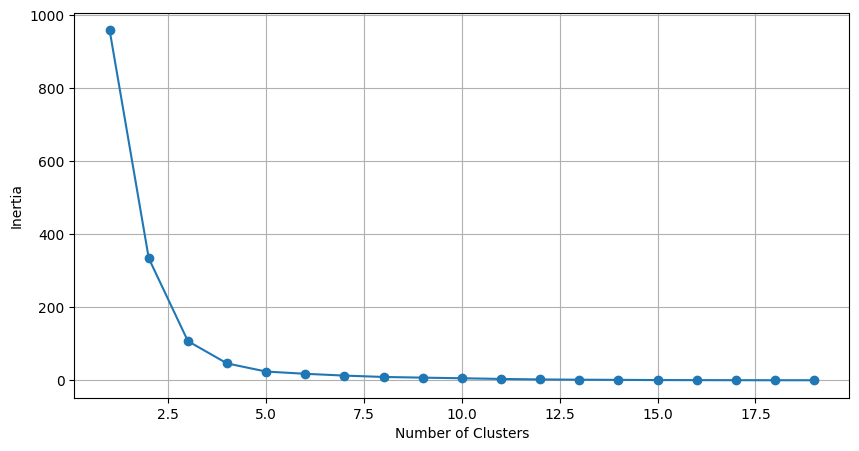

In [20]:
# show elbow plot
cr.optimise_k_means(df,20)

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(n_clusters=5)

##### Find nearest
We will now find the movies that is located as the nearest to the movie we will make a recommendations from.

In [22]:
# choose movie and size of recommendation
movie_title = "Harry Potter and the Goblet of Fire"
recommends_size = 5

In [23]:
# get movie index
movie_index = cr.get_movie_index_by_title(movie_title)
movie_index

205

In [24]:
# find the nearest movies
distances, indices = model_knn.kneighbors(df.iloc[movie_index,:].values.reshape(1, -1), n_neighbors = 6)

In [25]:
# indexes for the nearest movies
indices

array([[205,  37, 278, 367, 366, 384]], dtype=int64)

In [26]:
# the distances between the movie and every nearest movie found
distances

array([[0.        , 0.52376264, 0.5470693 , 0.56820273, 0.5713248 ,
        0.57914835]], dtype=float32)

##### K-means labels

In [27]:
df['labels'] = kmeans.labels_
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,labels
title,,,,,,,,,,,,,,,,,,,,,
"20,000 Leagues Under the Sea",0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2001: A Space Odyssey,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2
24 Hour Party People,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28 Days Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
28 Weeks Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


##### Show nearest movie and cluster group

In [28]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0} , cluster {1}:\n'.format(df.index[movie_index], df['labels'][[indices.flatten()[i]]].values[0]))
    else:
        print('{0}: {1}, with distance of {2}: cluster {3}'.
        format(i, df.index[indices.flatten()[i]], distances.flatten()[i],df['labels'][[indices.flatten()[i]]].values[0]))

Recommendations for Harry Potter and the Goblet of Fire , cluster 2:

1: American Pie, with distance of 0.5237626433372498: cluster 2
2: Madame Bovary, with distance of 0.5470693111419678: cluster 2
3: Rocky V, with distance of 0.5682027339935303: cluster 2
4: Rocky IV, with distance of 0.5713248252868652: cluster 2
5: Seven Blood-Stained Orchids, with distance of 0.5791483521461487: cluster 2


#### Result
The result of our modelling

In [29]:
# get 5 recommendations for the movie "Harry Potter and the Goblet of Fire"
recommends = cr.recommend_movies(movie_index, recommends_size)
recommends

['American Pie',
 'Madame Bovary',
 'Rocky V',
 'Rocky IV',
 'Seven Blood-Stained Orchids']